In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# read the dataset
data = pd.read_csv('online_shoppers_intention.csv')


In [2]:
missing = data.isnull().sum()
print(missing)


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [3]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

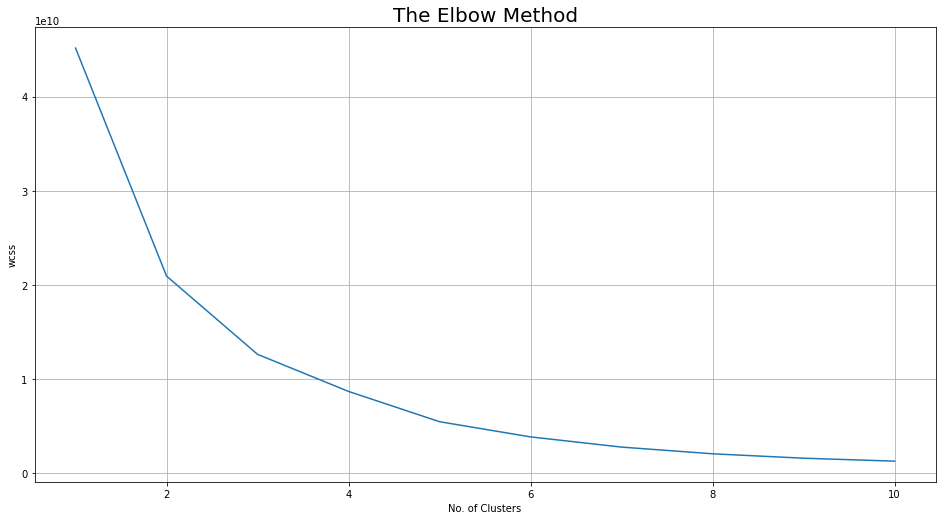

In [4]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'full',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

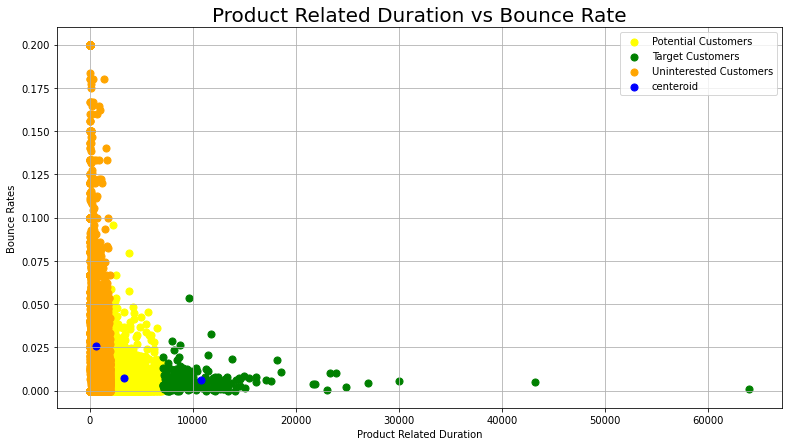

In [5]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Potential Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'green', label = 'Target Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'orange', label = 'Uninterested Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Product Related Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('Product Related Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

Adjusted rand index: 
0.09358725868409608


C:\Users\rohan\anaconda3\lib\site-packages\scikitplot\metrics.py:124: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


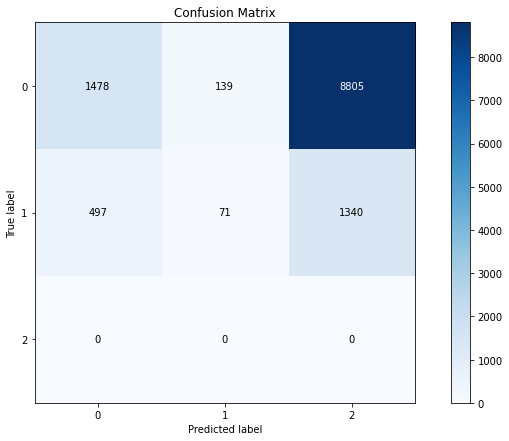

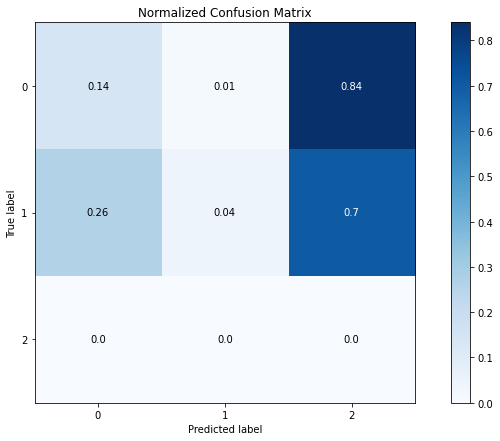

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

# get predicted clustering result label
labels_pred = y_means

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

# print confusion matrix
#cm = metrics.plot_confusion_matrix(None, labels_true, labels_pred)
#print(cm)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

In [7]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t